In [1]:
import colour
import color_correction
import numpy as np
import os
import cv2
import imageio
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
path = r"C:\Users\ecoplants\Desktop"
file = r"T_20220908_Albedo_2K.png"
img_path = r"\\EcoPlants-AI\material_scan\双目\20220908色卡\out_test\T_20220908色卡_Albedo_4K.png"

uint16


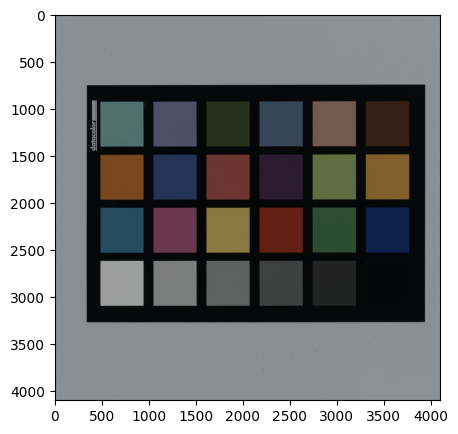

In [3]:
# img = cv2.imdecode(np.fromfile(os.path.join(path,file),dtype=np.uint8),-1)
img = cv2.imdecode(np.fromfile(img_path,dtype=np.uint8),-1)
print(img.dtype)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 65535

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

img = colour.cctf_decoding(img)

In [4]:
ratio = 1
with trange(50) as t:
    for _ in t:
        ratio = round(ratio * 0.95, 3)
        t.set_description(f'Image resize ratio [{ratio}]')
        img_resize = cv2.resize(img, (0, 0), fx = ratio, fy = ratio)
        swatch = color_correction.getColorCorrectionSwatches(img_resize, verbose = False)
        if swatch is not None:
            break


Image resize ratio [0.174]:  66%|██████▌   | 33/50 [00:22<00:11,  1.47it/s]


In [5]:
print(np.array(swatch))

[[ 0.08083982  0.16370755  0.15723996]
 [ 0.07530951  0.07830423  0.13069071]
 [ 0.02014115  0.03023904  0.01259228]
 [ 0.03650428  0.06138287  0.09635221]
 [ 0.17002958  0.1030744   0.0817391 ]
 [ 0.0334338   0.01458767  0.0081279 ]
 [ 0.1865349   0.06505352  0.01256287]
 [ 0.01819474  0.03489443  0.09617033]
 [ 0.14659175  0.03548787  0.03079761]
 [ 0.02496635  0.01167436  0.03029897]
 [ 0.12184824  0.15338738  0.05393575]
 [ 0.2188185   0.11493368  0.02556808]
 [ 0.01865856  0.07146285  0.11844143]
 [ 0.13899809  0.04063225  0.07152887]
 [ 0.2599746   0.194583    0.05031858]
 [ 0.12344471  0.01502692  0.00733085]
 [ 0.0271435   0.07555445  0.03396975]
 [ 0.00413767  0.0153932   0.07173888]
 [ 0.33414546  0.3379382   0.3368577 ]
 [ 0.2033318   0.20721124  0.20752475]
 [ 0.11471321  0.1178385   0.11778446]
 [ 0.05087733  0.05277071  0.05317301]
 [ 0.01531654  0.0163652   0.01605409]
 [ 0.00142266  0.00175915  0.00206119]]


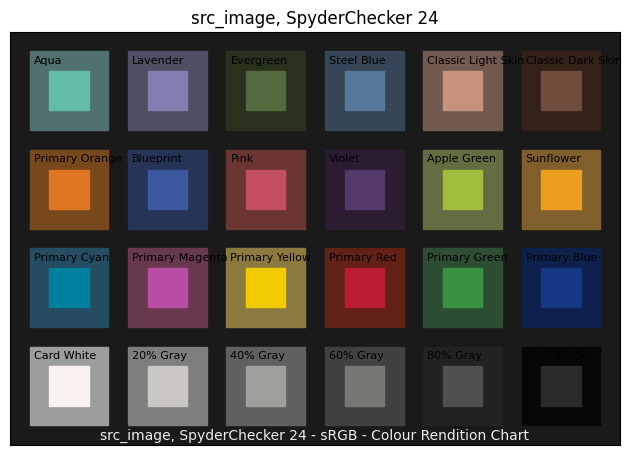

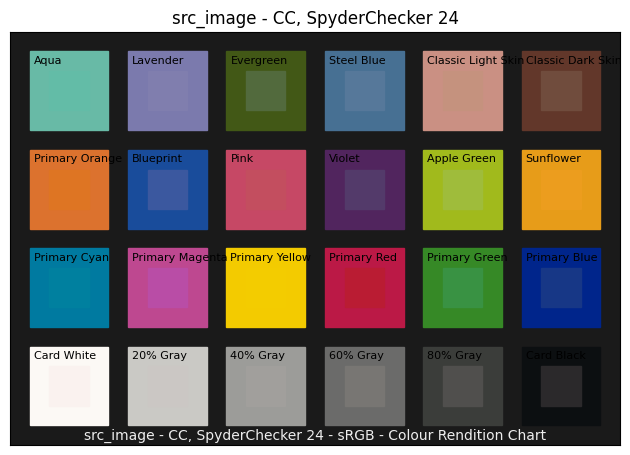

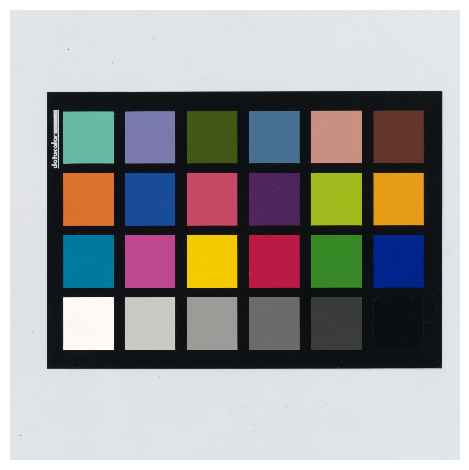

In [6]:
image_corrected = color_correction.correction(img_resize, swatch, verbose = True)
# print(image_corrected.min(), image_corrected.max())